In [119]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import os
import random
import torch
from torchvision import ops

(54, 113, 3)

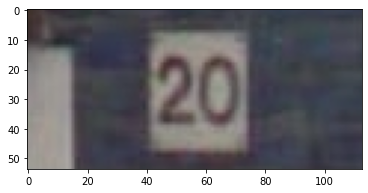

In [120]:
i=random.randint(1,33402)
img = cv2.imread(f'train/train/{i}.png')
plt.imshow(img)
img.shape

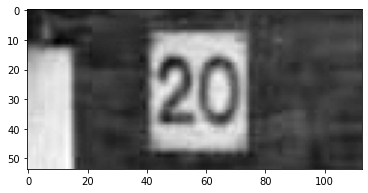

In [121]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [122]:
i

7802

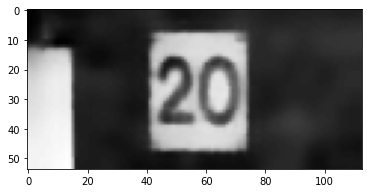

In [123]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Better than gaussian because it keeps edges sharp
plt.imshow(bfilter,cmap='gray')

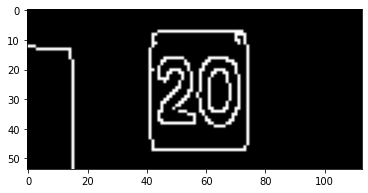

In [124]:
edges=cv2.Canny(bfilter,30,150)
plt.imshow(edges,cmap='gray')

In [125]:
keypoints= cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
countours=imutils.grab_contours(keypoints)
sorted_contours=sorted(countours,key=cv2.contourArea,reverse=True)
len(sorted_contours)

8

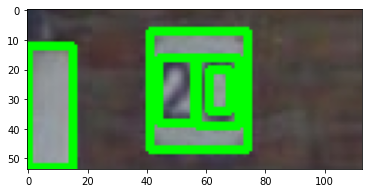

In [126]:
boxes=[]
for i  in range(len(sorted_contours)):
    mask=np.zeros(gray.shape,np.uint8)
    new_image=cv2.drawContours(mask,[sorted_contours[i]],-1,255,-1)
    (x,y)=np.where(mask==255)
    (x1,y1)=(np.min(x),np.min(y))
    (x2,y2)=(np.max(x),np.max(y))
    boxes.append([x1,y1,x2,y2])
    res=cv2.rectangle(img,(y1,x1),(y2,x2),(0,255,0),2)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [127]:
digitStucts=pd.read_json('digitStruct.json')

In [128]:
digitStucts.head()

,filename,boxes
0,1.png,"[{'height': 219.0, 'label': 1.0, 'left': 246.0..."
1,2.png,"[{'height': 32.0, 'label': 2.0, 'left': 77.0, ..."
2,3.png,"[{'height': 15.0, 'label': 2.0, 'left': 17.0, ..."
3,4.png,"[{'height': 34.0, 'label': 9.0, 'left': 57.0, ..."
4,5.png,"[{'height': 46.0, 'label': 3.0, 'left': 52.0, ..."


In [129]:
digitStucts.set_index('filename',inplace=True)

In [130]:
digitStucts.head()

,boxes
filename,
1.png,"[{'height': 219.0, 'label': 1.0, 'left': 246.0..."
2.png,"[{'height': 32.0, 'label': 2.0, 'left': 77.0, ..."
3.png,"[{'height': 15.0, 'label': 2.0, 'left': 17.0, ..."
4.png,"[{'height': 34.0, 'label': 9.0, 'left': 57.0, ..."
5.png,"[{'height': 46.0, 'label': 3.0, 'left': 52.0, ..."


In [131]:
digitStucts.loc['7802.png','boxes']

[{'height': 24.0, 'label': 2.0, 'left': 44.0, 'top': 15.0, 'width': 13.0},
 {'height': 24.0, 'label': 10.0, 'left': 57.0, 'top': 15.0, 'width': 14.0}]

In [132]:
ious=[]
for box in boxes:
    prediction_bbox = torch.tensor([box], dtype=torch.float)
    for contour in digitStucts.loc['7802.png','boxes']:
        ground_truth_bbox = torch.tensor([[contour['top'],contour['left'],contour['top']+contour['height'],contour['left']+contour['width']]], dtype=torch.float)
        iou = ops.box_iou(ground_truth_bbox, prediction_bbox)
        ious.append(iou.numpy()[0][0])

In [133]:
ious

[0.23636363,
 0.25454545,
 0.23636363,
 0.25454545,
 0.0,
 0.9583333,
 0.0,
 0.9583333,
 0.0,
 0.29166666,
 0.0,
 0.29166666,
 0.84615386,
 0.0,
 0.0,
 0.0]